# SDA - lecture 2 - Stochastic processes

In [54]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

%matplotlib inline

### Firing rate

In [49]:
# Generate a "spike train" of a neuron 
samp = 1000
rate = 20 / samp
duration = 10

spk_array = (np.random.uniform(size=samp*duration)<rate).astype(np.int32)
time_array = np.arange(0, duration, 1/samp)

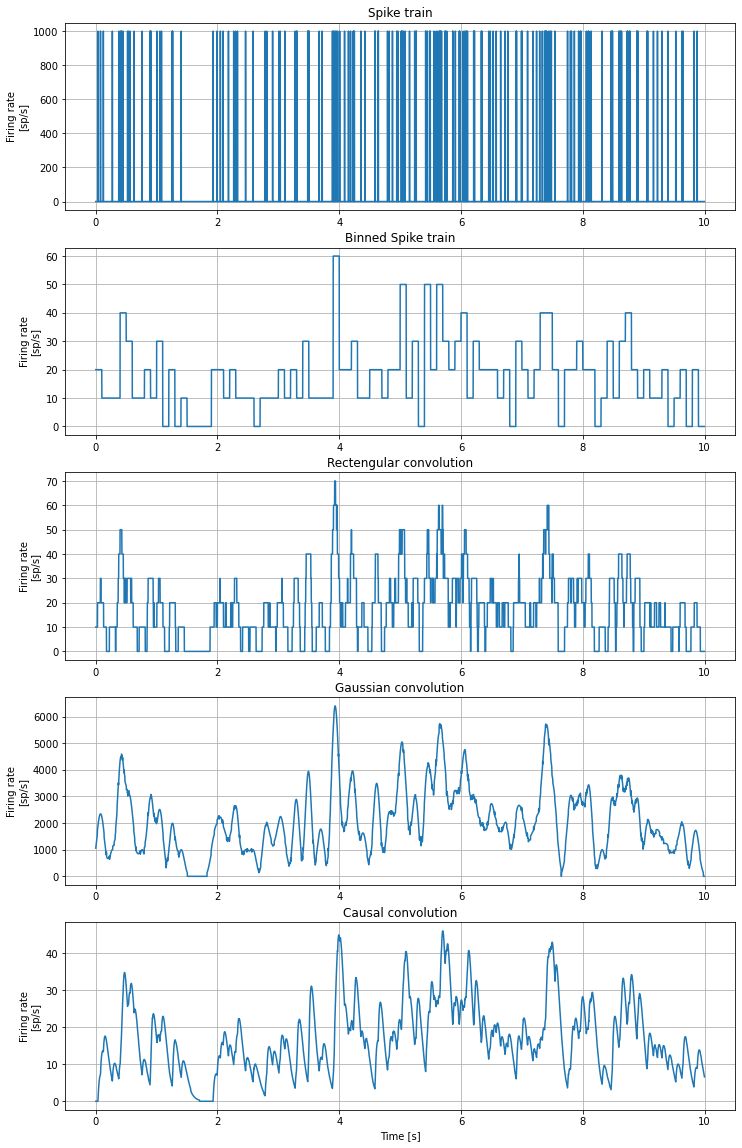

In [95]:
def rate_plot(x, y, ax, title, samp=1000):
    ax.plot(x,y*samp)
    ax.set_ylabel('Firing rate\n[sp/s]')
    ax.set_title(title)
    ax.grid()
    
fig, ax = plt.subplots(figsize=(12,20), nrows=5, ncols=1)

rate_plot(time_array, spk_array, ax[0], 'Spike train')

bin_size = 100
bin_array = np.zeros_like(spk_array, dtype=np.float32)
for i in np.arange(0, samp*duration, bin_size):
    bin_array[i:i+bin_size] = spk_array[i:i+bin_size].sum() / bin_size
rate_plot(time_array, bin_array, ax[1], 'Binned Spike train')

win_size = 100
win_array = np.ones(win_size)/win_size
rec_conv_array = np.convolve(spk_array, win_array, 'same')
rate_plot(time_array, rec_conv_array, ax[2], 'Rectengular convolution')

win_size = 200
conv_std = 50
gauss_array = sig.gaussian(win_size, conv_std) 
gauss_conv_array = np.convolve(spk_array, gauss_array, 'same')
rate_plot(time_array, gauss_conv_array, ax[3], 'Gaussian convolution')

alpha = 0.02
t = np.arange(-300,301)
alpha_array = alpha**2*(t*(t>0))*np.exp(-alpha*t)
alpha_conv_array = np.convolve(spk_array, alpha_array, 'same')
rate_plot(time_array, alpha_conv_array, ax[4], 'Causal convolution')

ax[4].set_xlabel('Time [s]');